# View the stellar spectrum

In this tutorial we take a look at how to inspect the stellar spectrum used in the limb-darkening calculation.

Let us instantiate the StellarLimbDarkening class for some specified parameters.

In [1]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from exotic_ld import StellarLimbDarkening


# "path/to/exotic_ld_data".
ld_data_path = os.environ["exotic_ld_data"]

sld = StellarLimbDarkening(M_H=0.01, Teff=5512, logg=4.47,
                           ld_model="mps1",
                           ld_data_path=ld_data_path,
                           interpolate_type="trilinear")

You can easily inspect the stellar intensity as a function of radial position on the stellar disc.

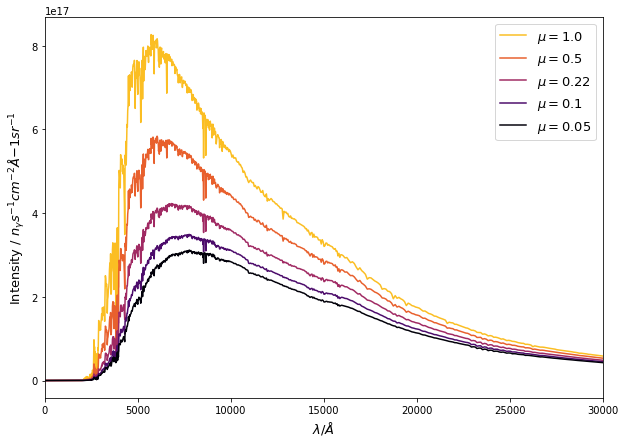

In [2]:
plt.figure(figsize=(10, 7))
for mu_idx in np.arange(0, sld.mus.shape[0], 5):
    plt.plot(sld.stellar_wavelengths, sld.stellar_intensities[:, mu_idx],
             color=cm.inferno(0.85 - mu_idx/sld.mus.shape[0]), label="$\mu={}$".format(sld.mus[mu_idx]))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1} sr^{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.legend(loc="upper right", fontsize=13)
plt.show()

Or, you can inspect the total spectrum by integrating across the stellar disc.

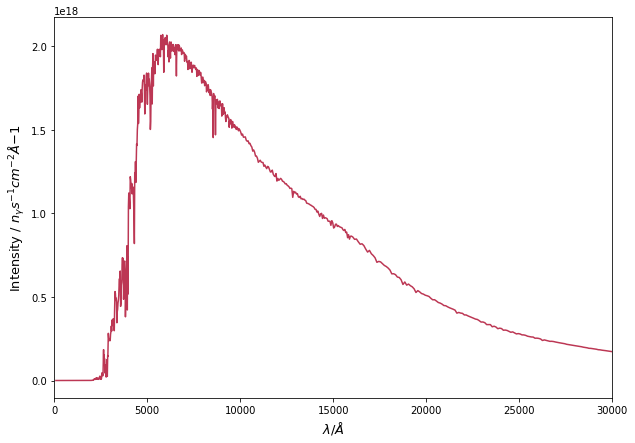

In [3]:
from scipy.interpolate import interp1d
from scipy.special import roots_legendre


rs = (1 - sld.mus**2)**0.5
roots, weights = roots_legendre(500)
a, b = (0., 1.)
t = (b - a) / 2 * roots + (a + b) / 2

spectrum = []
for wv_idx in range(sld.stellar_wavelengths.shape[0]):

    i_interp_func = interp1d(
        rs, sld.stellar_intensities[wv_idx, :], kind='linear',
        bounds_error=False, fill_value=0.)

    def integrand(_r):
        return i_interp_func(_r) * _r * 2. * np.pi

    spectrum.append((b - a) / 2. * integrand(t).dot(weights))

plt.figure(figsize=(10, 7))
plt.plot(sld.stellar_wavelengths, spectrum, color=cm.inferno(0.5))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.show()